##Arbitrary Value Imputation
it consists of replacing NaN by an arbitrary value

In [1]:
from google.colab import files
uploaded=files.upload()

Saving train (1).csv to train (1).csv


In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
def impute_nan(df,variable):
  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)

<Axes: >

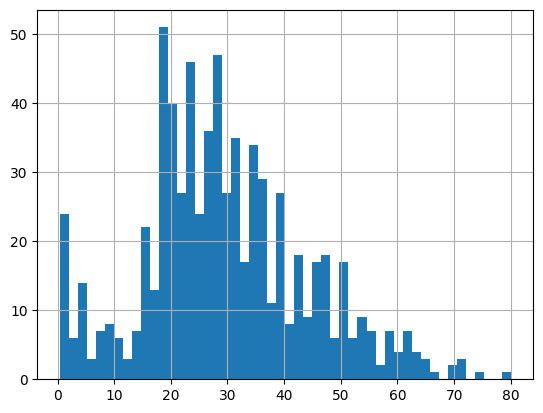

In [7]:
df['Age'].hist(bins=50)

###Advantages
Easy to implement.
Captures the importance of missingness if there is one.
###Disadvantages
Distorts the original distribution of the variable.
If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
Hard to decide which value to use.

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Housingtrain.csv to Housingtrain.csv


###how to handle categorical missing values?

##Frequent Category Imputation

In [9]:
import pandas as pd
df=pd.read_csv('Housingtrain.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [10]:
df.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [12]:
 df.isnull().mean().sort_values(ascending=True)

,0
SalePrice,0.000000
BsmtQual,0.025342
GarageType,0.055479
FireplaceQu,0.472603


#####Compute the frequency with every feature

In [15]:
df['BsmtQual'].value_counts()

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


<Axes: xlabel='BsmtQual'>

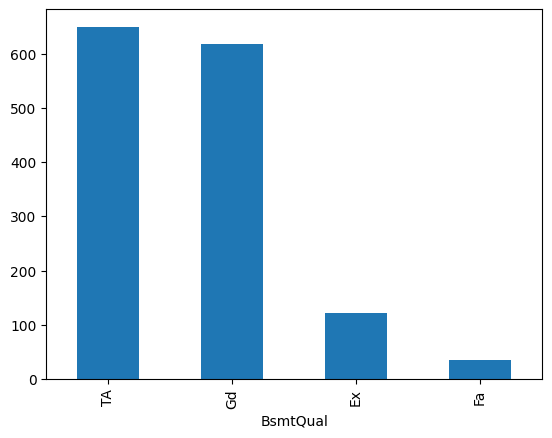

In [16]:
df['BsmtQual'].value_counts().plot.bar()

In [17]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

,BsmtQual
BsmtQual,
Ex,121
Fa,35
Gd,618
TA,649


<Axes: xlabel='BsmtQual'>

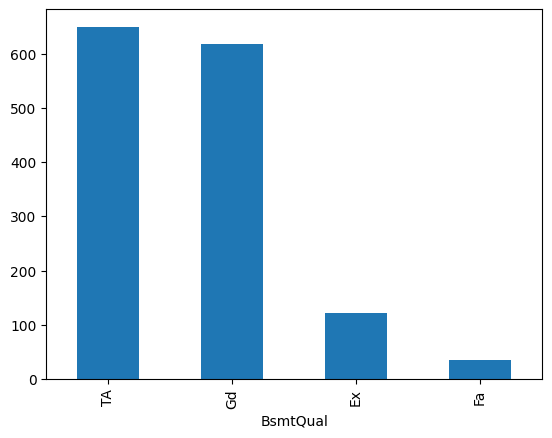

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='GarageType'>

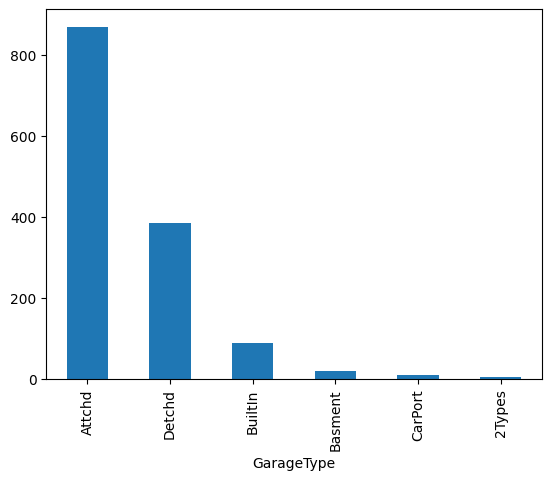

In [18]:
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

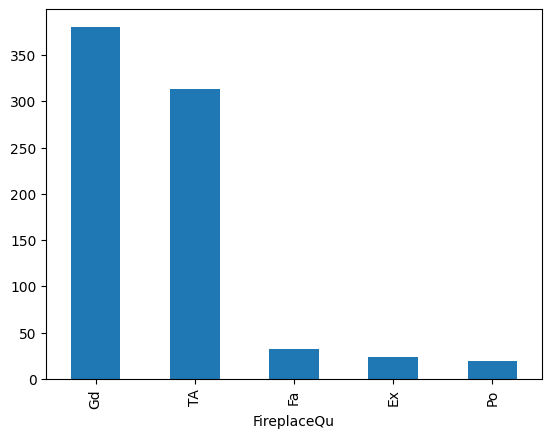

In [23]:
df['FireplaceQu'].value_counts().plot.bar()

In [33]:
#value.counts() → gives counts in descending order (most frequent → least frequent)descending order by default
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object', name='GarageType')

In [25]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [37]:
df['GarageType'].mode()[0] #mode returns the most frequent value

'Attchd'

In [38]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable] = df[variable].fillna(most_frequent_category)

In [39]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [40]:
df.isnull().mean()

,0
BsmtQual,0.0
FireplaceQu,0.0
GarageType,0.0
SalePrice,0.0


###advantages of Frequent Category Imputation
easy to implement,faster way to implement
###disadvantages of Frequent Category Imputation
since we are using the more frequent labels,it may use them in an over  represented way,if there are many NaNs.
it distorts the relation of the most frequent label.


## Adding a variable to capture NaN

In [56]:
df=pd.read_csv('Housingtrain.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [58]:
frequent=df['BsmtQual'].mode()[0]

In [59]:
df['BsmtQual'].fillna(frequent,inplace=True)
df.head(5)

/tmp/ipython-input-473027708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(frequent,inplace=True)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [60]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'] = df['FireplaceQu'].fillna(frequent)
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


####suppose if we have more frequent categories, we just replace NaN with a new category

In [62]:
df=pd.read_csv('Housingtrain.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [65]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [66]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head(5)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


##Handle categorical variable
####one hot encoding

In [68]:
from google.colab import files
uploaded=files.upload()

Saving train (1).csv to train (1).csv


In [72]:
import pandas as pd
df=pd.read_csv('train (1).csv',usecols=['Sex'])
df.head(5)

,Sex
0,male
1,female
2,female
3,female
4,male


In [73]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [74]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [77]:
df=pd.read_csv('train (1).csv',usecols=['Embarked'])
df.head(5)

,Embarked
0,S
1,C
2,S
3,S
4,S


In [78]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
df.dropna(inplace=True)

In [81]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [82]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


###Onehotencoding with many categories in a feature

In [84]:
from google.colab import files
uploaded=files.upload()

Saving train.csv.zip to train.csv.zip


In [86]:
df=pd.read_csv('train.csv.zip',usecols=["X0","X1","X2","X3","X4","X5","X6"])


In [87]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [89]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [90]:
len(df['X0'].unique())

47

In [91]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [92]:
df.X1.value_counts().sort_values(ascending=False).head(10)

,count
X1,
aa,833
s,598
b,592
l,590
v,408
r,251
i,203
a,143
c,121


In [94]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10) # instead of list i used list itself

In [95]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [96]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [97]:
lst_10.append('X1')

In [98]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
